# 第四章作业

1. 问题：三类模式样本集

w1:(1,0),(2,0),(1,1)

w2:(-1,0),(0,1),(-1,1)

w3:(-1,-1),(0,-1),(0,-2)

先验概率相等

答：

均值：

m1=(4/3,1/3)

m2=(-2/3,2/3)

m3=(-1/3,-4/3)

m=(1/9,-1/9)

协方差矩阵

c1=1/9*[[2,-1],[-1,2]]

c2=1/9*[[2,1],[1,2]]

c3=1/9*[[2,-1],[-1,2]]

类间散布矩阵Sb=1/81*[[62,13],[13,62]]

类内散布矩阵Sw=1/27*[[6,-1],[-1,6]]

2. 问题：两类样本集，出现概率相等

w1:(0,0,0),(2,0,0),(2,0,1),(1,2,0)

w1:(0,0,1),(0,1,0),(0,-2,1),(1,1,-2)

使用K-L变换降维到二维和一维，并画出样本在样本空间中的位置

In [33]:
import numpy as np

w1 = [[0, 0, 0], [2, 0, 0], [2, 0, 1], [1, 2, 0]]
w1 = np.array(w1)
w1 = w1.T

w2 = [[0, 0, 1], [0, 1, 0], [0, -2, 1], [1, 1, -2]]
w2 = np.array(w2)
w2 = w2.T

# print(w1)
# print(w2)

w = np.concatenate((w1, w2), axis=1)
# print(w)
m = np.mean(w, axis=1, keepdims=True)
# print(m)

w1 = w1 - m
w2 = w2 - m
w = w - m
# print(w1)
# print(w2)

tmp1 = np.zeros([3, 3])
for i in range(np.size(w1, 1)):
    test_i = w1[:, i].reshape([3, 1])
    tmp1 = tmp1 + test_i * test_i.T
tmp1 = tmp1/4

tmp2 = np.zeros([3, 3])
for i in range(np.size(w2, 1)):
    test_i = w2[:, i].reshape([3, 1])
    tmp2 = tmp2 + test_i * test_i.T
tmp2 = tmp2/4

# tmp = np.zeros([3, 3])
# for i in range(np.size(w, 1)):
#     test_i = w[:, i].reshape([3, 1])
#     tmp = tmp + test_i * test_i.T

R = 0.5 * tmp1 + 0.5 * tmp2
print("自相关矩阵\n")
print(R)


eigenvalue, featurevector=np.linalg.eig(R)
print("特征值和特征向量\n")
print(eigenvalue)
print(featurevector)
featurevector1 = featurevector[:,0].reshape([3,1])
featurevector2 = featurevector[:,1].reshape([3,1])

u2 = w = np.concatenate((featurevector1, featurevector2), axis=1)
w1_2 = np.dot(u2.T,w1)
w2_2 = np.dot(u2.T,w2)
print("降到二维的样本点\n")
print(w1_2)
print(w2_2)

u1 = featurevector1
w1_1 = np.dot(u1.T,w1)
w2_1 = np.dot(u1.T,w2)
print("降到一维的样本点\n")
print(w1_1)
print(w2_1)

自相关矩阵

[[ 0.6875    0.1875   -0.09375 ]
 [ 0.1875    1.1875   -0.53125 ]
 [-0.09375  -0.53125   0.859375]]
特征值和特征向量

[1.625      0.64876246 0.46061254]
[[ 0.21538745  0.95853318 -0.18660756]
 [ 0.78975397 -0.05858624  0.61061961]
 [-0.57436653  0.27889386  0.76962413]]
降到二维的样本点

[[-0.28718326  0.14359163 -0.4307749   1.50771213]
 [-0.73911506  1.17795131  1.45684517  0.10224564]]
[[-0.86154979  0.50257071 -2.44105774  1.86669121]
 [-0.4602212  -0.7977013  -0.34304872 -0.39695584]]
降到一维的样本点

[[-0.28718326  0.14359163 -0.4307749   1.50771213]]
[[-0.86154979  0.50257071 -2.44105774  1.86669121]]


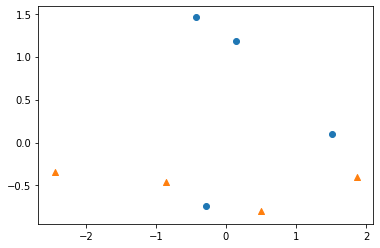

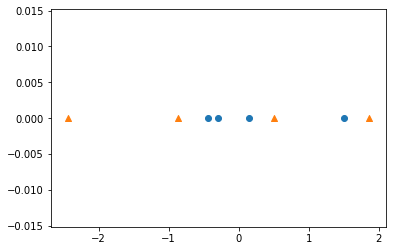

In [34]:
import matplotlib.pyplot as plt
# 绘制样本点
plt.scatter(w1_2[0], w1_2[1], marker='o')
plt.scatter(w2_2[0], w2_2[1], marker='^')
# 展示
plt.show()

plt.scatter(w1_1[0], np.zeros([4]), marker='o')
plt.scatter(w2_1[0], np.zeros([4]), marker='^')
# 展示
plt.show()